# Laboratory Nine - Anomaly Detection in Data

## Part I (Using Parametric Models):

1. For this part use the G-data (assume the first column is x and the second one is y) 

In [1]:
import pandas as pd

data1 = pd.read_csv('/Users/adunifekizitookoye/Desktop/CSCI 4150U - Data Mining/datasets2/G-data.csv', header=None)
data1.columns = ['col1', 'col2']
data1.head()

col1       col2
0  8.724514  16.680705
1  8.111094  14.039865
2  3.891538  11.217337
3  6.595019  16.108606
4  9.159665  15.282327

Text(0.5, 1.0, 'G-data')

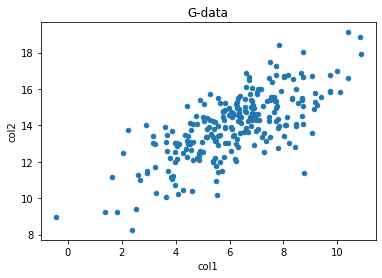

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

data1.plot.scatter(x='col1', y='col2')
plt.title('G-data')

2. Use Mahalanobis distance between (x,y) against the mean of x and y as the anomaly score.

In [3]:
print(data1.mean())
print(data1.cov())

col1     6.161942
col2    14.004147
dtype: float64
          col1      col2
col1  3.541314  2.449140
col2  2.449140  3.230053


In [4]:
import numpy as np

X = data1.values
S = data1.cov().values

for i in range(2):
    X[:, i] = X[:, i] - data1.mean()[i]

def mahalanobis(row):
    return np.matmul(row,S).dot(row)

anomaly_score1 = np.apply_along_axis( mahalanobis, axis=1, arr=X)

3. Draw an appropriate scatter plot showing the anomaly scores

Text(0.5, 1.0, 'G-data Anomaly Scores')

<Figure size 720x432 with 0 Axes>

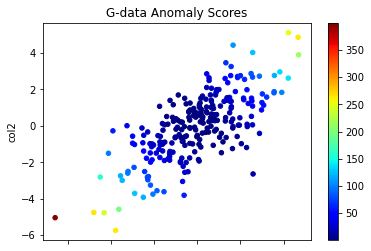

In [5]:
plt.figure(figsize=(10,6))
data1.plot.scatter(x='col1', y='col2', c=anomaly_score1, cmap='jet')
plt.title('G-data Anomaly Scores')

4. Report the top-5 points that you have detected as the anomaly

In [6]:
anom1 = pd.DataFrame(anomaly_score1, columns=['Anomaly Score'])
result1 = pd.concat((data1, anom1), axis=1)
result1.nlargest(5, 'Anomaly Score')

col1      col2  Anomaly Score
8   -6.600549 -5.045834     399.662410
94  -4.804438 -4.756795     266.773486
89   4.675894  4.860870     265.079681
26  -3.793011 -5.744357     264.258449
204  4.224742  5.111333     253.368184

## Part II (Using Distance-based Models):

1. For this part use compound, flame, and pathbased data sets

In [7]:
import pandas as pd

data2 = pd.read_csv('/Users/adunifekizitookoye/Desktop/CSCI 4150U - Data Mining/datasets2/compound.txt', 
                    delimiter='\t', header=None)
data2.columns = ['col1', 'col2', 'Class']
data2.head()

col1   col2  Class
0  26.75  22.15      1
1  29.80  22.15      1
2  31.55  21.10      1
3  27.70  20.85      1
4  29.90  19.95      1

In [8]:
data3 = pd.read_csv('/Users/adunifekizitookoye/Desktop/CSCI 4150U - Data Mining/datasets2/flame.txt', 
                    delimiter='\t', header=None)
data3.columns = ['col1', 'col2', 'Class']
data3.head()

col1   col2  Class
0  1.85  27.80      1
1  1.35  26.65      1
2  1.40  23.25      2
3  0.85  23.05      2
4  0.50  22.35      2

In [9]:
data4 = pd.read_csv('/Users/adunifekizitookoye/Desktop/CSCI 4150U - Data Mining/datasets2/pathbased.txt', 
                    delimiter='\t', header=None)
data4.columns = ['col1', 'col2', 'Class']
data4.head()

col1  col2  Class
0  11.25  5.05      1
1  10.95  4.70      1
2   9.85  5.80      1
3   9.80  5.75      1
4   9.15  6.80      1

### Compound
2. Use the distance to k'th nearest neighbour as the anomaly score  (for k =1, 2, 5)
3. Draw appropriate scatter plots showing the anomaly scores

Text(0.5, 1.0, 'Compound Anomaly Scores with K = 1')

<Figure size 720x432 with 0 Axes>

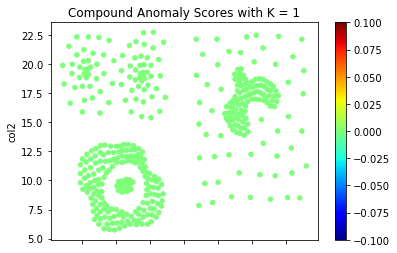

In [10]:
data2train = data2.drop(['Class'], axis=1)

from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

knn = 1
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data2train.values)
distances, indices = nbrs.kneighbors(data2train.values)
anomaly_score2 = distances[:,knn-1]

plt.figure(figsize=(10,6))
data2train.plot.scatter(x='col1', y='col2', c=anomaly_score2, cmap='jet')
plt.title('Compound Anomaly Scores with K = 1')

Text(0.5, 1.0, 'Compound Anomaly Scores with K = 2')

<Figure size 720x432 with 0 Axes>

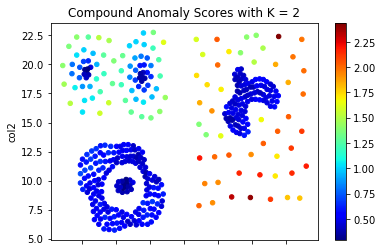

In [11]:
data2train = data2.drop(['Class'], axis=1)

from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data2train.values)
distances, indices = nbrs.kneighbors(data2train.values)
anomaly_score2 = distances[:,knn-1]

plt.figure(figsize=(10,6))
data2train.plot.scatter(x='col1', y='col2', c=anomaly_score2, cmap='jet')
plt.title('Compound Anomaly Scores with K = 2')

Text(0.5, 1.0, 'Compound Anomaly Scores with K = 5')

<Figure size 720x432 with 0 Axes>

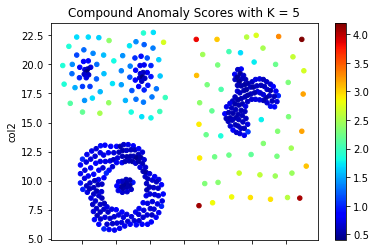

In [12]:
data2train = data2.drop(['Class'], axis=1)

from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

knn = 5
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data2train.values)
distances, indices = nbrs.kneighbors(data2train.values)
anomaly_score2 = distances[:,knn-1]

plt.figure(figsize=(10,6))
data2train.plot.scatter(x='col1', y='col2', c=anomaly_score2, cmap='jet')
plt.title('Compound Anomaly Scores with K = 5')

4. Report the top-5 points that you have detected as the anomaly



In [13]:
anom2 = pd.DataFrame(anomaly_score2, columns=['Anomaly Score'])
result2II = pd.concat((data2train, anom2), axis=1)
result2II.nlargest(5, 'Anomaly Score')

col1   col2  Anomaly Score
42  42.25  22.15       4.205948
19  27.15   7.85       4.101219
37  41.95   8.50       4.070626
0   26.75  22.15       3.842200
43  38.85  22.40       3.301515

### Flame
2. Use the distance to k'th nearest neighbour as the anomaly score  (for k =1, 2, 5)
3. Draw appropriate scatter plots showing the anomaly scores

Text(0.5, 1.0, 'Flame Anomaly Scores with K = 1')

<Figure size 720x432 with 0 Axes>

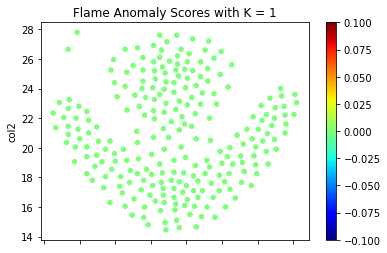

In [14]:
data3train = data3.drop(['Class'], axis=1)

from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

knn = 1
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data3train.values)
distances, indices = nbrs.kneighbors(data3train.values)
anomaly_score3 = distances[:,knn-1]

plt.figure(figsize=(10,6))
data3train.plot.scatter(x='col1', y='col2', c=anomaly_score3, cmap='jet')
plt.title('Flame Anomaly Scores with K = 1')

Text(0.5, 1.0, 'Flame Anomaly Scores with K = 2')

<Figure size 720x432 with 0 Axes>

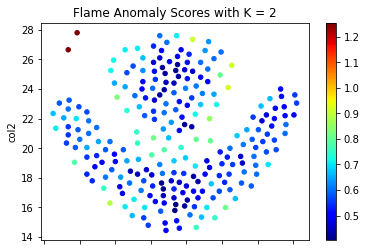

In [15]:
data3train = data3.drop(['Class'], axis=1)

from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data3train.values)
distances, indices = nbrs.kneighbors(data3train.values)
anomaly_score3 = distances[:,knn-1]

plt.figure(figsize=(10,6))
data3train.plot.scatter(x='col1', y='col2', c=anomaly_score3, cmap='jet')
plt.title('Flame Anomaly Scores with K = 2')

Text(0.5, 1.0, 'Flame Anomaly Scores with K = 5')

<Figure size 720x432 with 0 Axes>

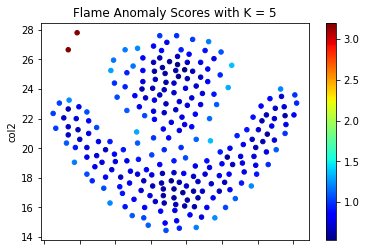

In [16]:
data3train = data3.drop(['Class'], axis=1)

from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

knn = 5
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data3train.values)
distances, indices = nbrs.kneighbors(data3train.values)
anomaly_score3 = distances[:,knn-1]

plt.figure(figsize=(10,6))
data3train.plot.scatter(x='col1', y='col2', c=anomaly_score3, cmap='jet')
plt.title('Flame Anomaly Scores with K = 5')

4. Report the top-5 points that you have detected as the anomaly

In [17]:
anom3 = pd.DataFrame(anomaly_score3, columns=['Anomaly Score'])
result3II = pd.concat((data3train, anom3), axis=1)
result3II.nlargest(5, 'Anomaly Score')

col1   col2  Anomaly Score
1     1.35  26.65       3.200000
0     1.85  27.80       3.180016
204  10.55  25.60       1.372953
158   9.35  20.50       1.364734
192  10.35  24.10       1.320984

### Pathbased
2. Use the distance to k'th nearest neighbour as the anomaly score  (for k =1, 2, 5)
3. Draw appropriate scatter plots showing the anomaly scores

Text(0.5, 1.0, 'Pathbased Anomaly Scores with K = 1')

<Figure size 720x432 with 0 Axes>

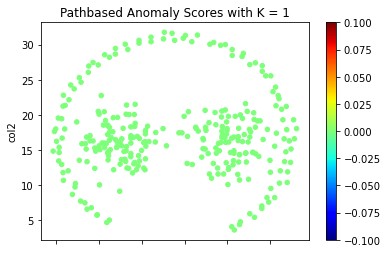

In [18]:
data4train = data4.drop(['Class'], axis=1)

from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

knn = 1
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data4train.values)
distances, indices = nbrs.kneighbors(data4train.values)
anomaly_score4 = distances[:,knn-1]

plt.figure(figsize=(10,6))
data4train.plot.scatter(x='col1', y='col2', c=anomaly_score4, cmap='jet')
plt.title('Pathbased Anomaly Scores with K = 1')

Text(0.5, 1.0, 'Pathbased Anomaly Scores with K = 2')

<Figure size 720x432 with 0 Axes>

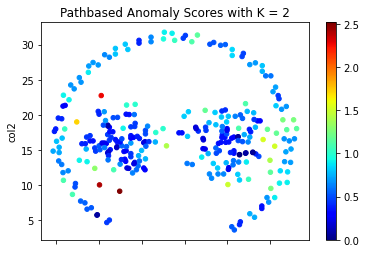

In [19]:
data4train = data4.drop(['Class'], axis=1)

from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data4train.values)
distances, indices = nbrs.kneighbors(data4train.values)
anomaly_score4 = distances[:,knn-1]

plt.figure(figsize=(10,6))
data4train.plot.scatter(x='col1', y='col2', c=anomaly_score4, cmap='jet')
plt.title('Pathbased Anomaly Scores with K = 2')

Text(0.5, 1.0, 'Pathbased Anomaly Scores with K = 5')

<Figure size 720x432 with 0 Axes>

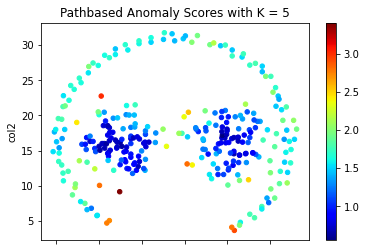

In [20]:
data4train = data4.drop(['Class'], axis=1)

from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

knn = 5
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data4train.values)
distances, indices = nbrs.kneighbors(data4train.values)
anomaly_score4 = distances[:,knn-1]

plt.figure(figsize=(10,6))
data4train.plot.scatter(x='col1', y='col2', c=anomaly_score4, cmap='jet')
plt.title('Pathbased Anomaly Scores with K = 5')

4. Report the top-5 points that you have detected as the anomaly

In [21]:
anom4 = pd.DataFrame(anomaly_score4, columns=['Anomaly Score'])
result4II = pd.concat((data4train, anom4), axis=1)
result4II.nlargest(5, 'Anomaly Score')

col1   col2  Anomaly Score
202  12.45   9.15       3.407712
270  10.30  22.75       3.022003
101  25.80   3.65       2.920616
144  20.30  13.10       2.821790
203  10.10  10.05       2.807134

## Part III (Using Density-based Models):

### Compound
1. Use "relative density" as the anomaly score with the following definition for the density:
    1. Density is the inverse of distance to k’th neighbour (for k = 1, 2, 5)
    2. Density is the inverse of the average distance to k neighbours (for k = 1, 2, 5)
2. Draw appropriate scatter plots showing the anomaly scores

Text(0.5, 1.0, 'Compound Anomaly Scores with K = 6')

<Figure size 720x432 with 0 Axes>

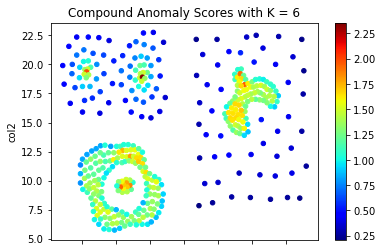

In [22]:
# Density is the inverse of distance to k’th neighbour (for k = 6 (since 1 doesn't work))

data2train = data2.drop(['Class'], axis=1)

from numpy import linalg

from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

knn = 6
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data2train.values)
distances, indices = nbrs.kneighbors(data2train.values)

anomaly_score2inv = 1/distances[:,knn-1]

plt.figure(figsize=(10,6))
data2train.plot.scatter(x='col1', y='col2', c=anomaly_score2inv, cmap='jet')
plt.title('Compound Anomaly Scores with K = 6')

Text(0.5, 1.0, 'Compound Anomaly Scores with K = 2')

<Figure size 720x432 with 0 Axes>

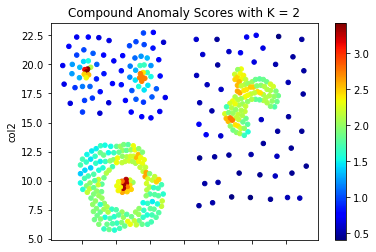

In [23]:
# Density is the inverse of distance to k’th neighbour (for k = )

data2train = data2.drop(['Class'], axis=1)

from numpy import linalg

from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data2train.values)
distances, indices = nbrs.kneighbors(data2train.values)

anomaly_score2inv = 1/distances[:,knn-1]

plt.figure(figsize=(10,6))
data2train.plot.scatter(x='col1', y='col2', c=anomaly_score2inv, cmap='jet')
plt.title('Compound Anomaly Scores with K = 2')

Text(0.5, 1.0, 'Compound Anomaly Scores with K = 5')

<Figure size 720x432 with 0 Axes>

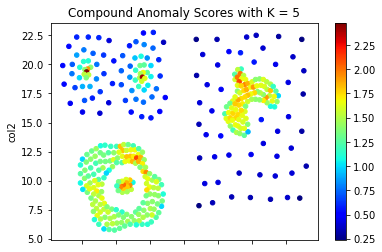

In [24]:
# Density is the inverse of distance to k’th neighbour (for k = 5)

data2train = data2.drop(['Class'], axis=1)

from numpy import linalg

from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

knn = 5
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data2train.values)
distances, indices = nbrs.kneighbors(data2train.values)

anomaly_score2inv = 1/distances[:,knn-1]

plt.figure(figsize=(10,6))
data2train.plot.scatter(x='col1', y='col2', c=anomaly_score2inv, cmap='jet')
plt.title('Compound Anomaly Scores with K = 5')

Text(0.5, 1.0, 'Compound Anomaly Scores with K = 1')

<Figure size 720x432 with 0 Axes>

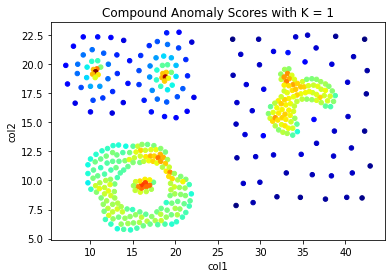

In [25]:
#Density is the inverse of the average distance to k neighbours (for k = 6(since for 1 doesn't work))
data2train = data2.drop(['Class'], axis=1)

from numpy import linalg

from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

knn = 6
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data2train.values)
distances, indices = nbrs.kneighbors(data2train.values)

meanarr = []
anomaly_score2inv_avg = []

N, d = distances.shape
for i in range(N):
    meanarr.append(np.mean(distances[i,:]))
for i in range(N):
    anomaly_score2inv_avg.append(1/meanarr[i])

plt.figure(figsize=(10,6))
data2train.plot.scatter(x='col1', y='col2', c=anomaly_score2inv_avg, cmap='jet')
plt.title('Compound Anomaly Scores with K = 1')

Text(0.5, 1.0, 'Compound Anomaly Scores with K = 2')

<Figure size 720x432 with 0 Axes>

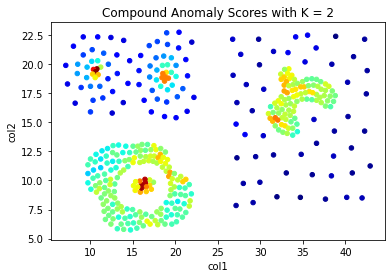

In [26]:
#Density is the inverse of the average distance to k neighbours (for k = 2)
data2train = data2.drop(['Class'], axis=1)

from numpy import linalg

from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data2train.values)
distances, indices = nbrs.kneighbors(data2train.values)

meanarr = []
anomaly_score2inv_avg = []

N, d = distances.shape
for i in range(N):
    meanarr.append(np.mean(distances[i,:]))
for i in range(N):
    anomaly_score2inv_avg.append(1/meanarr[i])

plt.figure(figsize=(10,6))
data2train.plot.scatter(x='col1', y='col2', c=anomaly_score2inv_avg, cmap='jet')
plt.title('Compound Anomaly Scores with K = 2')

Text(0.5, 1.0, 'Compound Anomaly Scores with K = 5')

<Figure size 720x432 with 0 Axes>

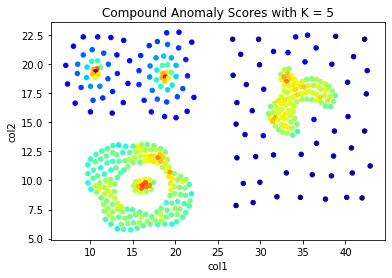

In [27]:
#Density is the inverse of the average distance to k neighbours (for k = 5)
data2train = data2.drop(['Class'], axis=1)

from numpy import linalg

from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

knn = 5
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data2train.values)
distances, indices = nbrs.kneighbors(data2train.values)

meanarr = []
anomaly_score2inv_avg = []

N, d = distances.shape
for i in range(N):
    meanarr.append(np.mean(distances[i,:]))
for i in range(N):
    anomaly_score2inv_avg.append(1/meanarr[i])

plt.figure(figsize=(10,6))
data2train.plot.scatter(x='col1', y='col2', c=anomaly_score2inv_avg, cmap='jet')
plt.title('Compound Anomaly Scores with K = 5')

3. Report the top-5 points that you have detected as the anomaly for each method

In [28]:
anom2_inv = pd.DataFrame(anomaly_score2inv, columns=['Anomaly Score'])
result2_inv = pd.concat((data2train, anom2_inv), axis=1)
result2_inv.nlargest(5, 'Anomaly Score')

col1   col2  Anomaly Score
166  10.65  19.35       2.480695
209  18.85  18.90       2.425356
58   33.05  18.50       2.119996
330  18.00  11.95       2.108185
393  16.05   9.65       2.030692

In [29]:
anom2inv_avg = pd.DataFrame(anomaly_score2inv_avg, columns=['Anomaly Score'])
result2inv_avg = pd.concat((data2train, anom2inv_avg), axis=1)
result2inv_avg.nlargest(5, 'Anomaly Score')

col1   col2  Anomaly Score
166  10.65  19.35       3.557885
209  18.85  18.90       3.239529
393  16.05   9.65       3.072499
388  16.50   9.80       2.974417
164  10.80  19.60       2.956800

### Flame
1. Use "relative density" as the anomaly score with the following definition for the density:
    1. Density is the inverse of distance to k’th neighbour (for k = 1, 2, 5)
    2. Density is the inverse of the average distance to k neighbours (for k = 1, 2, 5)
2. Draw appropriate scatter plots showing the anomaly scores
3. Report the top-5 points that you have detected as the anomaly for each method

Text(0.5, 1.0, 'Flame Anomaly Scores with K = 6')

<Figure size 720x432 with 0 Axes>

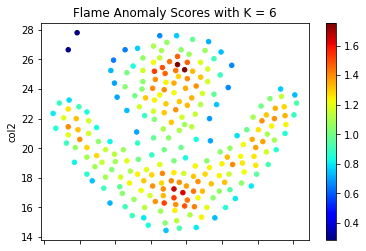

In [30]:
# Density is the inverse of distance to k’th neighbour (for k = 6)
data3train = data3.drop(['Class'], axis=1)

from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

knn = 6
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data3train.values)
distances, indices = nbrs.kneighbors(data3train.values)

anomaly_score3inv = 1/distances[:,knn-1]

plt.figure(figsize=(10,6))
data3train.plot.scatter(x='col1', y='col2', c=anomaly_score3inv, cmap='jet')
plt.title('Flame Anomaly Scores with K = 6')

Text(0.5, 1.0, 'Flame Anomaly Scores with K = 2')

<Figure size 720x432 with 0 Axes>

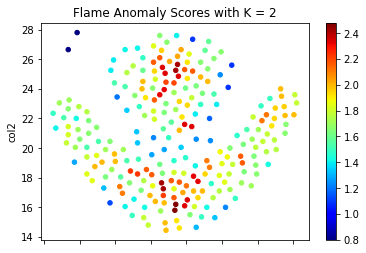

In [31]:
# Density is the inverse of distance to k’th neighbour (for k = 2)
data3train = data3.drop(['Class'], axis=1)

from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data3train.values)
distances, indices = nbrs.kneighbors(data3train.values)

anomaly_score3inv = 1/distances[:,knn-1]

plt.figure(figsize=(10,6))
data3train.plot.scatter(x='col1', y='col2', c=anomaly_score3inv, cmap='jet')
plt.title('Flame Anomaly Scores with K = 2')

Text(0.5, 1.0, 'Flame Anomaly Scores with K = 5')

<Figure size 720x432 with 0 Axes>

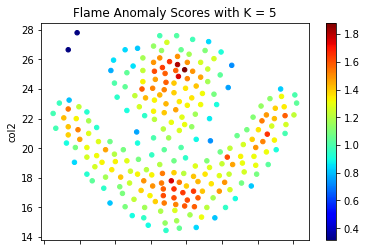

In [32]:
# Density is the inverse of distance to k’th neighbour (for k = 5)
data3train = data3.drop(['Class'], axis=1)

from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

knn = 5
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data3train.values)
distances, indices = nbrs.kneighbors(data3train.values)

anomaly_score3inv = 1/distances[:,knn-1]

plt.figure(figsize=(10,6))
data3train.plot.scatter(x='col1', y='col2', c=anomaly_score3inv, cmap='jet')
plt.title('Flame Anomaly Scores with K = 5')

In [33]:
anom3 = pd.DataFrame(anomaly_score3inv, columns=['Anomaly Score'])
result3 = pd.concat((data3train, anom3), axis=1)
result3.nlargest(5, 'Anomaly Score')

col1   col2  Anomaly Score
216  7.90  25.30       1.881442
236  7.50  25.65       1.818182
219  7.55  24.85       1.754116
65   7.15  17.80       1.754116
68   7.30  17.25       1.666667

Text(0.5, 1.0, 'Flame Anomaly Scores with K = 6')

<Figure size 720x432 with 0 Axes>

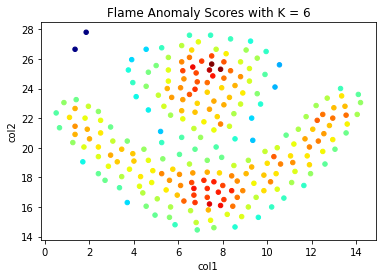

In [34]:
#Density is the inverse of the average distance to k neighbours (for k = 6)
data3train = data3.drop(['Class'], axis=1)

from numpy import linalg

from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

knn = 6
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data3train.values)
distances, indices = nbrs.kneighbors(data3train.values)

meanarr = []
anomaly_score3inv_avg = []

N, d = distances.shape
for i in range(N):
    meanarr.append(np.mean(distances[i,:]))
for i in range(N):
    anomaly_score3inv_avg.append(1/meanarr[i])

plt.figure(figsize=(10,6))
data3train.plot.scatter(x='col1', y='col2', c=anomaly_score3inv_avg, cmap='jet')
plt.title('Flame Anomaly Scores with K = 6')

Text(0.5, 1.0, 'Flame Anomaly Scores with K = 2')

<Figure size 720x432 with 0 Axes>

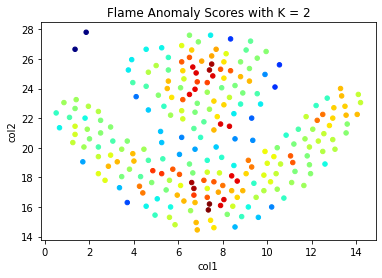

In [35]:
#Density is the inverse of the average distance to k neighbours (for k = 2)
data3train = data3.drop(['Class'], axis=1)

from numpy import linalg

from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

knn = 2
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data3train.values)
distances, indices = nbrs.kneighbors(data3train.values)

meanarr = []
anomaly_score3inv_avg = []

N, d = distances.shape
for i in range(N):
    meanarr.append(np.mean(distances[i,:]))
for i in range(N):
    anomaly_score3inv_avg.append(1/meanarr[i])

plt.figure(figsize=(10,6))
data3train.plot.scatter(x='col1', y='col2', c=anomaly_score3inv_avg, cmap='jet')
plt.title('Flame Anomaly Scores with K = 2')

Text(0.5, 1.0, 'Flame Anomaly Scores with K = 5')

<Figure size 720x432 with 0 Axes>

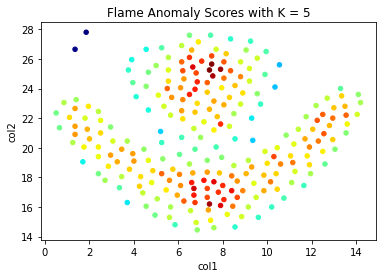

In [36]:
#Density is the inverse of the average distance to k neighbours (for k = 5)
data3train = data3.drop(['Class'], axis=1)

from numpy import linalg

from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

knn = 5
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data3train.values)
distances, indices = nbrs.kneighbors(data3train.values)

meanarr = []
anomaly_score3inv_avg = []

N, d = distances.shape
for i in range(N):
    meanarr.append(np.mean(distances[i,:]))
for i in range(N):
    anomaly_score3inv_avg.append(1/meanarr[i])

plt.figure(figsize=(10,6))
data3train.plot.scatter(x='col1', y='col2', c=anomaly_score3inv_avg, cmap='jet')
plt.title('Flame Anomaly Scores with K = 5')

3. Report the top-5 points that you have detected as the anomaly for each method

In [37]:
anom3_inv = pd.DataFrame(anomaly_score3inv, columns=['Anomaly Score'])
result3_inv = pd.concat((data3train, anom3_inv), axis=1)
result3_inv.nlargest(5, 'Anomaly Score')

col1   col2  Anomaly Score
216  7.90  25.30       1.881442
236  7.50  25.65       1.818182
219  7.55  24.85       1.754116
65   7.15  17.80       1.754116
68   7.30  17.25       1.666667

In [38]:
anom3inv_avg = pd.DataFrame(anomaly_score3inv_avg, columns=['Anomaly Score'])
result3inv_avg = pd.concat((data3train, anom3inv_avg), axis=1)
result3inv_avg.nlargest(5, 'Anomaly Score')

col1   col2  Anomaly Score
229  7.40  25.25       2.532338
236  7.50  25.65       2.517293
216  7.90  25.30       2.478937
72   7.40  16.20       2.461067
219  7.55  24.85       2.458108

### Pathbased
1. Use "relative density" as the anomaly score with the following definition for the density:
    1. Density is the inverse of distance to k’th neighbour (for k = 1, 2, 5)
    2. Density is the inverse of the average distance to k neighbours (for k = 1, 2, 5)
2. Draw appropriate scatter plots showing the anomaly scores

Text(0.5, 1.0, 'Pathbased Anomaly Scores with K = 6')

<Figure size 720x432 with 0 Axes>

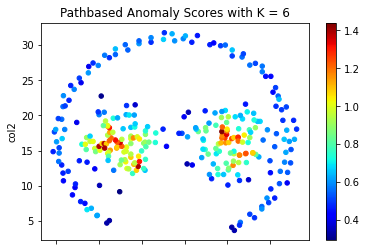

In [39]:
# Density is the inverse of distance to k’th neighbour (for k = 6)
data4train = data4.drop(['Class'], axis=1)

from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

knn = 6
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data4train.values)
distances, indices = nbrs.kneighbors(data4train.values)

anomaly_score4inv = 1/distances[:,knn-1]

plt.figure(figsize=(10,6))
data4train.plot.scatter(x='col1', y='col2', c=anomaly_score4inv, cmap='jet')
plt.title('Pathbased Anomaly Scores with K = 6')

Text(0.5, 1.0, 'Pathbased Anomaly Scores with K = 7')

<Figure size 720x432 with 0 Axes>

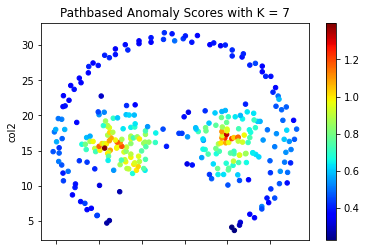

In [40]:
# Density is the inverse of distance to k’th neighbour (for k = 7)
data4train = data4.drop(['Class'], axis=1)

from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

knn = 7
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data4train.values)
distances, indices = nbrs.kneighbors(data4train.values)

anomaly_score4inv = 1/distances[:,knn-1]

plt.figure(figsize=(10,6))
data4train.plot.scatter(x='col1', y='col2', c=anomaly_score4inv, cmap='jet')
plt.title('Pathbased Anomaly Scores with K = 7')

Text(0.5, 1.0, 'Pathbased Anomaly Scores with K = 5')

<Figure size 720x432 with 0 Axes>

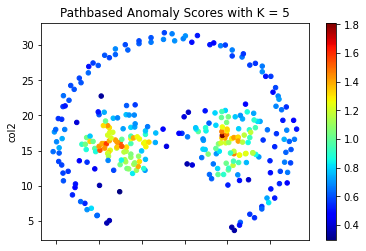

In [41]:
# Density is the inverse of distance to k’th neighbour (for k = 5)
data4train = data4.drop(['Class'], axis=1)

from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

knn = 5
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data4train.values)
distances, indices = nbrs.kneighbors(data4train.values)

anomaly_score4inv = 1/distances[:,knn-1]

plt.figure(figsize=(10,6))
data4train.plot.scatter(x='col1', y='col2', c=anomaly_score4inv, cmap='jet')
plt.title('Pathbased Anomaly Scores with K = 5')

Text(0.5, 1.0, 'Pathbased Anomaly Scores with K = 6')

<Figure size 720x432 with 0 Axes>

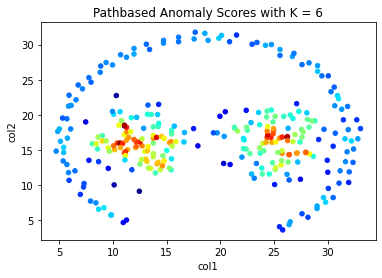

In [42]:
#Density is the inverse of the average distance to k neighbours (for k = 6)
data4train = data4.drop(['Class'], axis=1)

from numpy import linalg

from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

knn = 6
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data4train.values)
distances, indices = nbrs.kneighbors(data4train.values)

meanarr = []
anomaly_score4inv_avg = []

N, d = distances.shape
for i in range(N):
    meanarr.append(np.mean(distances[i,:]))
for i in range(N):
    anomaly_score4inv_avg.append(1/meanarr[i])

plt.figure(figsize=(10,6))
data4train.plot.scatter(x='col1', y='col2', c=anomaly_score4inv_avg, cmap='jet')
plt.title('Pathbased Anomaly Scores with K = 6')

Text(0.5, 1.0, 'Pathbased Anomaly Scores with K = 7')

<Figure size 720x432 with 0 Axes>

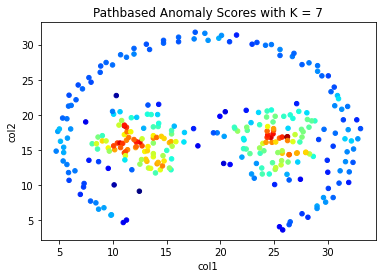

In [43]:
#Density is the inverse of the average distance to k neighbours (for k = 7)
data4train = data4.drop(['Class'], axis=1)

from numpy import linalg

from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

knn = 7
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data4train.values)
distances, indices = nbrs.kneighbors(data4train.values)

meanarr = []
anomaly_score4inv_avg = []

N, d = distances.shape
for i in range(N):
    meanarr.append(np.mean(distances[i,:]))
for i in range(N):
    anomaly_score4inv_avg.append(1/meanarr[i])

plt.figure(figsize=(10,6))
data4train.plot.scatter(x='col1', y='col2', c=anomaly_score4inv_avg, cmap='jet')
plt.title('Pathbased Anomaly Scores with K = 7')

Text(0.5, 1.0, 'Pathbased Anomaly Scores with K = 5')

<Figure size 720x432 with 0 Axes>

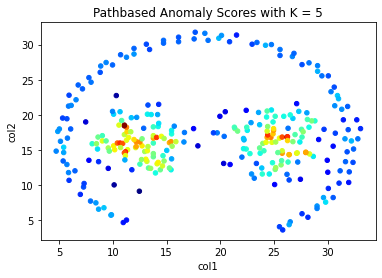

In [44]:
#Density is the inverse of the average distance to k neighbours (for k = 5)
data4train = data4.drop(['Class'], axis=1)

from numpy import linalg

from sklearn.neighbors import NearestNeighbors
import numpy as np
from scipy.spatial import distance

knn = 5
nbrs = NearestNeighbors(n_neighbors=knn, metric=distance.euclidean).fit(data4train.values)
distances, indices = nbrs.kneighbors(data4train.values)

meanarr = []
anomaly_score4inv_avg = []

N, d = distances.shape
for i in range(N):
    meanarr.append(np.mean(distances[i,:]))
for i in range(N):
    anomaly_score4inv_avg.append(1/meanarr[i])

plt.figure(figsize=(10,6))
data4train.plot.scatter(x='col1', y='col2', c=anomaly_score4inv_avg, cmap='jet')
plt.title('Pathbased Anomaly Scores with K = 5')

3. Report the top-5 points that you have detected as the anomaly for each method

In [45]:
anom4_inv = pd.DataFrame(anomaly_score4inv, columns=['Anomaly Score'])
result4_inv = pd.concat((data4train, anom4_inv), axis=1)
result4_inv.nlargest(5, 'Anomaly Score')

col1   col2  Anomaly Score
183  24.40  17.15       1.810715
221  10.90  15.95       1.581139
217  10.15  15.05       1.538462
252  12.70  15.60       1.538462
253  12.50  16.15       1.533930

In [46]:
anom4inv_avg = pd.DataFrame(anomaly_score4inv_avg, columns=['Anomaly Score'])
result4inv_avg = pd.concat((data4train, anom4inv_avg), axis=1)
result4inv_avg.nlargest(5, 'Anomaly Score')

col1   col2  Anomaly Score
263  11.05  18.55       3.017548
262  11.05  18.45       2.970331
155  26.20  16.85       2.875058
224  11.15  14.75       2.716162
220  10.65  16.00       2.662433